In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/btsdata/data.json


Reading json data and creating data frame (pandas)

In [2]:
import json
data = json.load(open('../input/btsdata/data.json'))
df = pd.DataFrame(data['data'])
df.head()
print(f'initial size: {df.size}')
print(data['data'])


initial size: 152
[{'public_metrics': {'retweet_count': 690, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-05-24T11:59:59.000Z', 'text': 'RT @GoldenJKUnivers: Jungkook Proof Funds Support\n\nDonations for #BTS_Proof are now open. If you wish to support Jungkook’s contribution to…', 'id': '1529069700222697478'}, {'public_metrics': {'retweet_count': 395, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-05-24T11:59:59.000Z', 'text': 'RT @laviedenoona: Listen to #Seoul_RM by #RM is My trending Song Choice @BTS_twt', 'id': '1529069700218601472'}, {'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-05-24T11:59:59.000Z', 'text': '@vkFroz 7♡\nWE LOVE YOU TAEHYUNG\n #태태충전\n #귀여운_김태형_대회\n#정바비_참여곡_삭제해 \n(@BTS_twt )', 'id': '1529069700084277248'}, {'public_metrics': {'retweet_count': 6815, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-05-24T11:59:59.000Z', 

Creating word cloud

In [3]:
import re

data = json.load(open('../input/btsdata/data.json'))

text = ""

bad_words = [
    "rt", "@co", "@bts_twtrt"
]

for data in data['data']:
    tweet = data['text'].lower().split()
    
    print(data['text'].lower())
    print(data['created_at'])
    
    for word in tweet:
        if word in bad_words:
            continue
        elif word.startswith("https"):
            continue
        else:
            text = text + " " + word

text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')

print(text)

rt @goldenjkunivers: jungkook proof funds support

donations for #bts_proof are now open. if you wish to support jungkook’s contribution to…
2022-05-24T11:59:59.000Z
rt @laviedenoona: listen to #seoul_rm by #rm is my trending song choice @bts_twt
2022-05-24T11:59:59.000Z
@vkfroz 7♡
we love you taehyung
 #태태충전
 #귀여운_김태형_대회
#정바비_참여곡_삭제해 
(@bts_twt )
2022-05-24T11:59:59.000Z
rt @zer0xblack: 220524 j-hope instagram story 
uarmyhope: with @/rkive @/agustd
https://t.co/ugzujnzkkf
#bts #방탄소년단 @bts_twt https://t.co/m…
2022-05-24T11:59:59.000Z
rt @kchartsmaster: "that that (prod.&amp;feat. suga of @bts_twt)" by @psy_oppa has now spent 15 days at #1 on melon daily chart.
2022-05-24T11:59:59.000Z
rt @be_u_4_u_love: army let's focus on bts can't wait for #yettocome from the new album #bts_proof out june 10 by #bts @bts_twt
2022-05-24T11:59:59.000Z
rt @almostdita: are you ready?

i can't wait to hear #yettocome by the legendary #bts from their anthology #bts_proof (@bts_twt)
2022-05-24T11:59:59.000

In [4]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(25,25))
    plt.imshow(wordcloud)
    plt.axis("off");

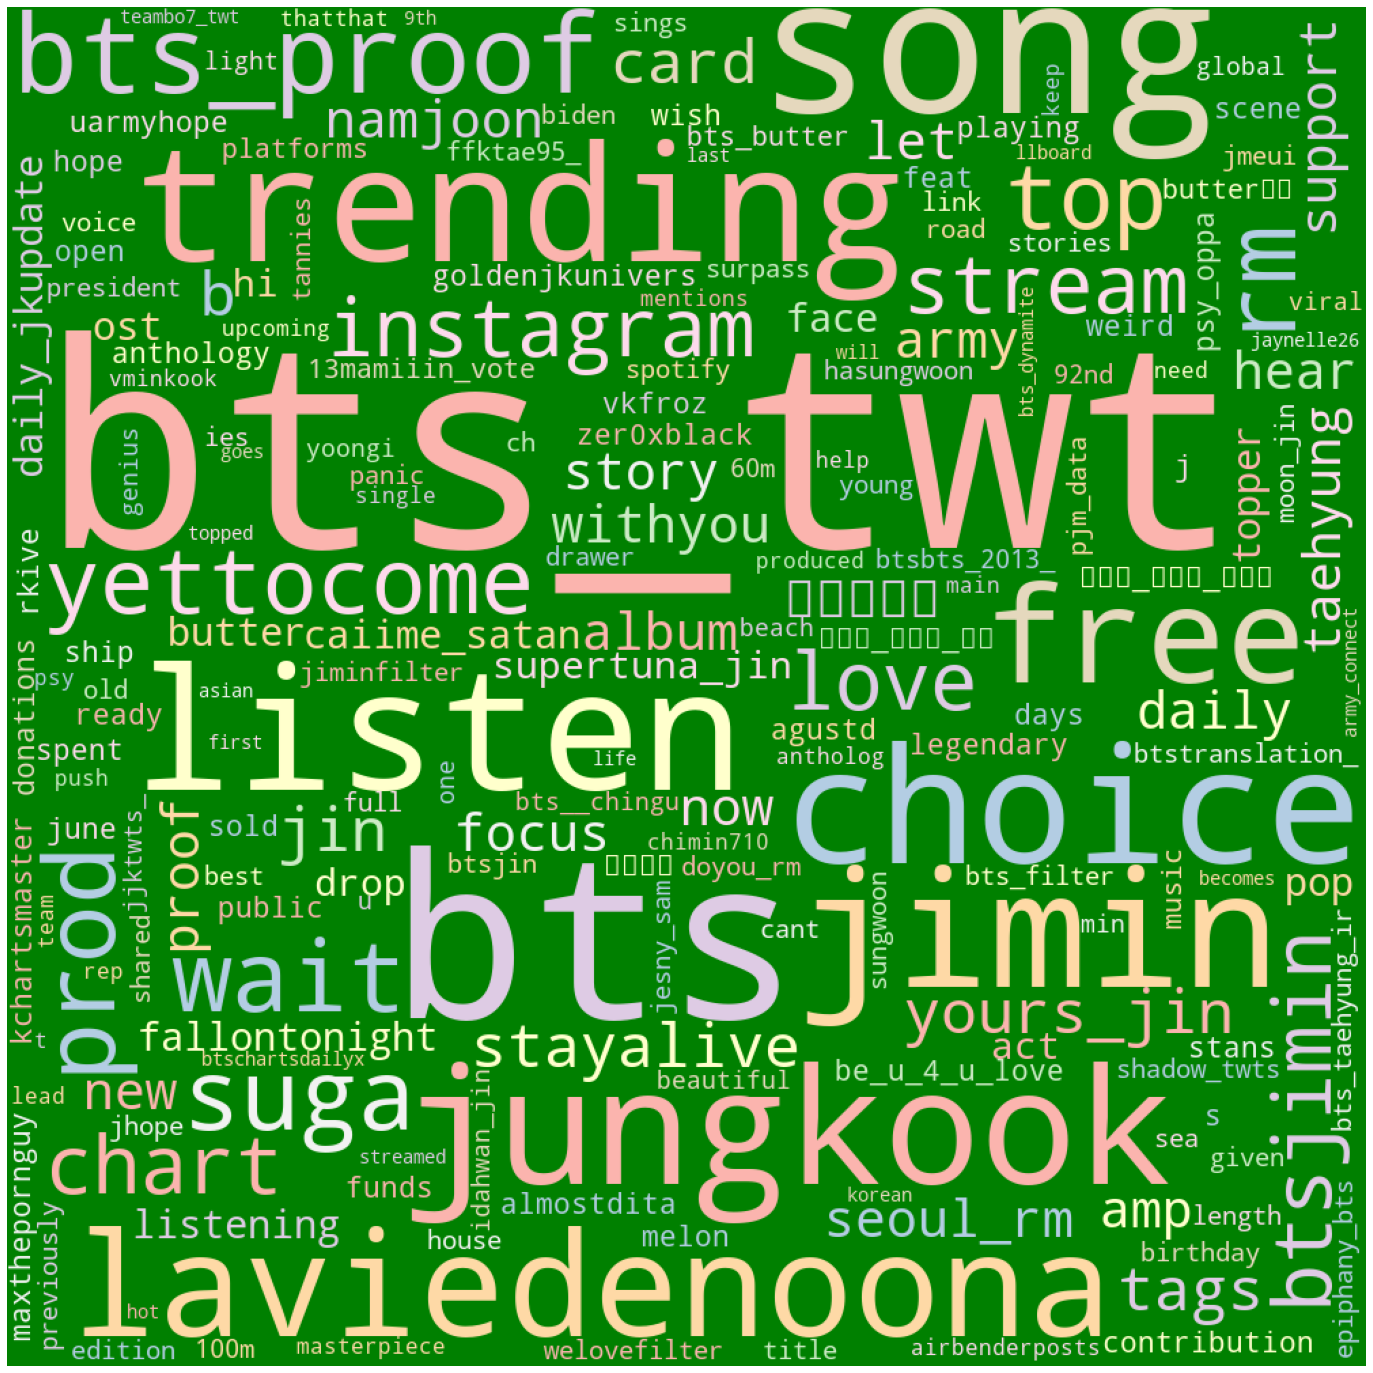

In [5]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1000, height=1000, random_state = 1,
                     background_color='green', colormap='Pastel1', collocations=False,
                     stopwords = STOPWORDS).generate(text)

plot_cloud(wordcloud)